# **KOMPRESI CITRA METODE DWT (DESCRETE WAVELET TRANSFORM)**



**Upload File Citra**

> Citra Warna "10 citra .JPG, 10 citra .PNG, 10 citra .BMP "







**![alt text](https://www.dcrevoisier.com/wp-content/uploads/2016/01/AdditiveColor.svg_-300x300.png)**

In [2]:
#Upload file citra 1x runtime
from google.colab import files
upload = files.upload()

Saving 1.bmp to 1.bmp


In [1]:
#Upload file citra 1x runtime
from google.colab import files
upload = files.upload()

Saving 1.bmp to 1.bmp


**Import Library**

> " import library python yang akan digunakan "



In [0]:
#import library
import matplotlib.pyplot as plt
from numpy import zeros
import numpy as np
import scipy.misc
import pywt.data
import pywt
import cv2
import random
import imageio

**Fungsi dan Class**

In [0]:
def LtoRShift(block):
    return np.transpose(block)

def RtoLShift(block):
    new = np.zeros(block.shape)
    for i in range(len(block)-1, -1, -1):
        for j in range(len(block)-1-i):
            new[i][j] = block[len(block)-1-j][len(block)-1-i]
    for i in range(len(block)-1, -1, -1):
        new[i][len(block)-1-i] = block[i][len(block)-1-i]
    for i in range(len(block)-1, -1, -1):
        for j in range(len(block)-i, len(block)):
            new[i][j] = block[len(block)-1-j][len(block)-1-i]
    return new

#stack together the blocks to create the image
def ConstructImage(block):
    new_image = np.block([block[0:block_incr]])
    for i in range(1, block_incr):
        b = np.block([block[i*block_incr:(i+1)*block_incr]])
        new_image = np.vstack([new_image, b])
    return new_image

#Convert to textured image the input image
def ColorToTexturedImage(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    y, cr, cb = cv2.split(ycrcb)
    ycrcb = cv2.merge((y, cr, cb))
    plt.imshow(ycrcb)
    
    titles = ['L', ' H']
    cfs = pywt.dwt(y, 'haar')
    CA, CB = cfs
    fig = plt.figure(figsize=(3, 3))
    for i, a in enumerate([CA, CB]):
        ax = fig.add_subplot(1, 2, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    plt.show()
    
    i = pywt.idwt(cb, cr, 'haar')
    plt.imshow(i)
    
    titles = ['LL', ' LH', 'HL', 'HH']
    coeffs2 = pywt.dwt2(y, 'haar')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
    plt.show()
    
    newcb = zeros([len(LL), len(LL[0])])
    for i in range(len(cb)):
        for j in range(len(cb[0]), 2):
            newcb[i][j] = cb[i][j]
    newcr = zeros([len(LL), len(LL[0])])
    for i in range(len(cr)):
        for j in range(len(cr[0]), 2):
            newcr[i][j] = cr[i][j]
    
    coeffs = (LL, (newcb, newcr, HH))
    img = pywt.idwt2(coeffs, 'haar')
    #tambahan
    imageio.imwrite('textured.png', img)
    #scipy.misc.imsave('textured.png', img)

    return img

#Permute the blocks randomly
def ShuffleImage(img, seed):
    block = []
    for i in range(0, factor, incr):
        for j in range(0, factor, incr):
            block.append(img[i:i+incr, j:j+incr])
    
    random.seed(seed)
    random.shuffle(block)
    
    new_image = ConstructImage(block)
    #tambahan
    imageio.imwrite('textured_shuffled.png', new_image)
    #scipy.misc.imsave('textured_shuffled.png', new_image)

    return new_image, block

#Triangular shuffle the blocks
def TriangularShuffling(block):
    for i in range(0, len(block), 2):   #even
        block[i] = LtoRShift(block[i])
    for i in range(1, len(block), 2):   #odd
        block[i] = RtoLShift(block[i])
    return block

def Compression(img, seed):
    img = ColorToTexturedImage(img)
    new_image, block = ShuffleImage(img, seed)
    block = TriangularShuffling(block)
    new_image = ConstructImage(block)
    #tambahan
    imageio.imwrite('textured_shuffled_triangular.png', new_image)
    #scipy.misc.imsave('textured_shuffled_triangular.png', new_image)

#Triangular reshuffle the image
def InvTriangularShuffling(img):
    block = []
    for i in range(0, factor, incr):
        for j in range(0, factor, incr):
            block.append(img[i:i+incr, j:j+incr])
    block = TriangularShuffling(block)
    new_image = ConstructImage(block)
    #tambahan
    imageio.imwrite('tringular_textured_shuffled_triangular_rev1.png', new_image)
    #scipy.misc.imsave('tringular_textured_shuffled_triangular_rev1.png', new_image)
    return block

#Reorder the randomly permuted image
def ReshuffleImage(block, seed):
    new_block = [0]*len(block)
    Order = list(range(len(block)))
    random.seed(seed)
    random.shuffle(Order)
    for index, originalIndex in enumerate(Order):
        new_block[originalIndex] = block[index]
    new_image = ConstructImage(new_block)
    #tambahan
    imageio.imwrite('tringular_textured_shuffled_triangular_rev2.png', new_image)
    #scipy.misc.imsave('tringular_textured_shuffled_triangular_rev2.png', new_image)
    return new_image

#Obtain the colored image from the textured image
def TexturedToColorImage(img):
    cfs = pywt.dwt(img, 'haar')
    CA, CB = cfs
    coeffs2 = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs2
    coeffs = (LL, (LH, HL, HH))
    y = pywt.idwt2(coeffs, 'haar')
    y = y.astype(np.uint8)
    new_img = cv2.merge((y, cr, cb))
    rgb = cv2.cvtColor(new_img, cv2.COLOR_YCR_CB2BGR)
    #tambahan
    imageio.imwrite('tringular_textured_shuffled_triangular_rev3.png', rgb)
    #scipy.misc.imsave('tringular_textured_shuffled_triangular_rev3.png', rgb)

def Decompression(seed):
    img = cv2.imread('textured_shuffled_triangular.png', cv2.IMREAD_GRAYSCALE)
    block = InvTriangularShuffling(img)
    new_image = ReshuffleImage(block, seed)
    TexturedToColorImage(new_image)


**Proses Main Program**

> " Proses kompresi DWT dimulai dari olah citra, kompresi dan hasil"



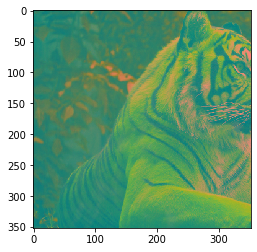

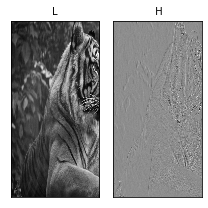

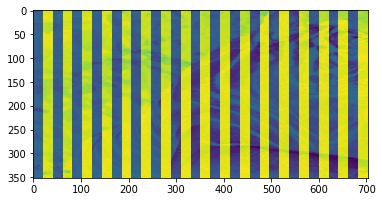

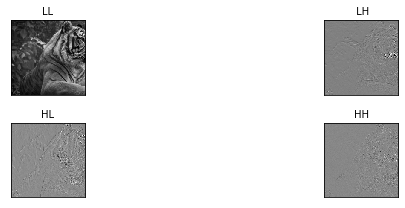

In [4]:
# Preprocessing
img_name ='1'
incr = 8
basic_seed = 63
org_img = cv2.imread(img_name + ".bmp", cv2.IMREAD_COLOR)
factor = min(org_img.shape[0], org_img.shape[1]) % incr
factor = min(org_img.shape[0], org_img.shape[1]) - factor
block_incr = factor//incr
img = org_img[:factor, :factor]
#tambahan
imageio.imwrite('original.png', img)
#scipy.misc.imsave('original.png', img)

ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
y, cr, cb = cv2.split(ycrcb)
Compression(img, basic_seed)
Decompression(basic_seed)

**Hitung Rasio Kompresi**

In [5]:
import os
compression = (1-os.path.getsize('tringular_textured_shuffled_triangular_rev3.png')
/os.path.getsize('original.png'))*100
uasli= os.path.getsize('original.png')
ukompres = os.path.getsize('tringular_textured_shuffled_triangular_rev3.png')
print('Ukuran asli file citra = ',uasli)
print('Ukuran file citra sesudah kompresi = ',ukompres)
print('Besar Kompresi adalah ',compression,' %')

Ukuran asli file citra =  252613
Ukuran file citra sesudah kompresi =  240035
Besar Kompresi adalah  4.9791578422329845  %


**Cek MSE**

> " Fungsi untuk menghitung MSE (Mean squared error) "



![alt text](https://radiokuantum.files.wordpress.com/2017/07/render.png)

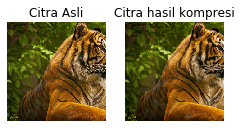

Citra Asli vs. Citra Asli


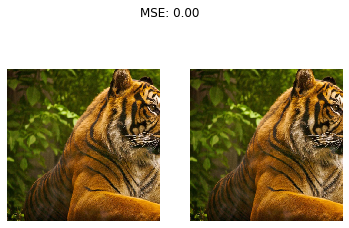

Citra Asli vs. Citra Hasil kompresi


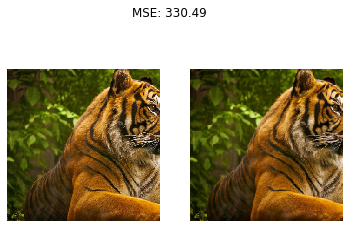

In [6]:
def mse(imageA, imageB):
	# NOTE: the two images must have the same dimension !!!!
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
 
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
 
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f" % (m))
 
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
 
	# show the images
	plt.show()
 
#ambil image
#catatan harus gunakan file type sama ex.png dan dimensi sama
asli = cv2.imread("original.png")
kompres = cv2.imread("tringular_textured_shuffled_triangular_rev3.png")

# initialize the figure
fig = plt.figure("Images")
images = ("Citra Asli", asli), ("Citra hasil kompresi", kompres)
 
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
 
# show the figure
plt.show()
 
# compare the images
print("====================================================")
print("Citra Asli vs. Citra Asli")
compare_images(asli, asli,'a')
print("====================================================")
print("Citra Asli vs. Citra Hasil kompresi")
compare_images(asli, kompres,'b')
print("====================================================")

**Cek PSNR**

> " Fungsi untuk menghitung PSNR "



![alt text](https://radiokuantum.files.wordpress.com/2017/07/render-1.png)

In [7]:
#import lib tambahan
import math
asli = cv2.imread("original.png")
kompres = cv2.imread("tringular_textured_shuffled_triangular_rev3.png")
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(asli,kompres)
print("Nilai PSNR Citra asli vs kompres adalah : ",d)

Nilai PSNR Citra asli vs kompres adalah :  32.08967828195126
